# Exchange Rates

In this project, I will the use Euro-USD exchange rate data to practice creating data visualizations. The dat describes Euro daily exchange rates between 1999 and 2021, and can be found [here](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020).

First, I will read in and explore the data:

In [1]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

In [2]:
exchange_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [3]:
exchange_rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5698,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [4]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

## Data Cleaning

The first column contains the date, and will need to be converted to a DateTime object. There are 40 other columns, each for a different currency. Most columns have 5699 data points, but there are some columns that contain null values (maybe the currency did not exist for the entire time period, or there could be another reason for the missing data). Most columns have the exchange rate stored as just a string, not a float value.

In this project I am just concerned with USD, so I don't need to bother cleaning the other columns.

I will rename the `US dollar`  and `Period\Unit:` columns, change the `Time` column to a DateTime data type, sort the values by `Time` in ascending order, and reset the index.

In [5]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]

euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0867     6
          ..
1.1386     1
1.2104     1
1.4413     1
1.4662     1
1.3211     1
Name: US_dollar, Length: 3528, dtype: int64

There is an issue: 62 of the days have no value. I will drop these rows, then convert the `Us_dollar` column to a float data type.

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']


euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       5637 non-null   datetime64[ns]
 1   US_dollar  5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


## Rolling Mean

First, I will plot my exchange rate data:

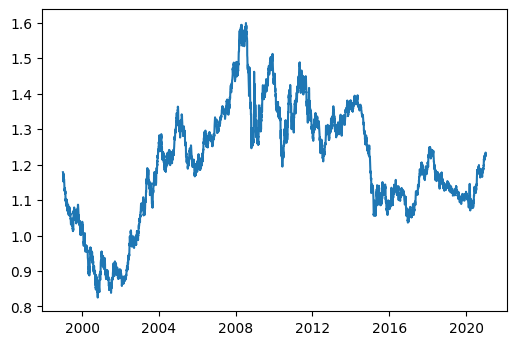

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

I would like the line to be smoother, so to visualize the exchange rate, I will calculate the 30 day rolling mean and add it to my dataframe.

In [9]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

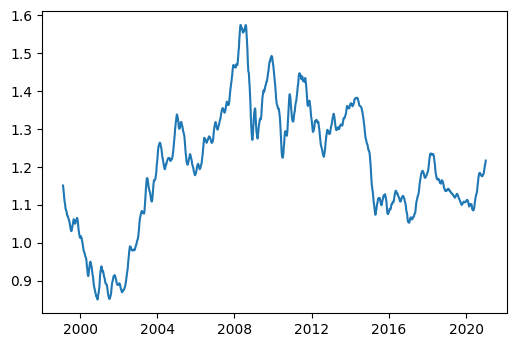

In [10]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

I like the look of this graph with a 30-day rolling mean.

Some ideas for the visualization I am going to build:
- I can show how the euro-dollar rate has changed during the coronavirus pandemic. I can show the 2020 data and the 2016-2019 data as a baseline. I can use a line plot.
- I canshow how the euro-dollar rate changed during the 2007-2008 financial crisis. I can also show the data for 2006 and 2009 for comparison. I can use a line plot.
- I can show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). I can use a line plot.
- I could do a similar idea as above, but instead with the Chairman of the Federal Reserve instead of the president.

## Exchange Rate, Chairman of the Federal Reserve, and President of the European Central Bank

I have decided to plot the exchange rate and examine who was the Chariman of the US Federal Reserve at the time, as well as President of the European Central Bank.

Chairman of the Federal Reserve:
- Alan Greenspan: August 11, 1987 - January 31, 2006
- Ben Bernanke: February 1, 2006 - January 31, 2014
- Janet Yellen: February 3, 2014 -February 3, 2018
- Jay Powell: February 5, 2018 - Incumbent

President of the European Central Bank:
- Wim Duisenberg: 1 June 1998 - 31 October 2003
- Jean-Claude Trichet: 1 November 2003 - 31 October 2011
- Mario Draghi: 1 November 2011 - 31 October 2019
- Christine Lagarde: 1 November 2019 - Incumbent

I will create a dataframe for each person:

In [11]:
greenspan = euro_to_dollar[(euro_to_dollar['Time'] >= '1987-08-11')
                                & (euro_to_dollar['Time'] <= '2006-01-31')]
bernanke = euro_to_dollar[(euro_to_dollar['Time'] >= '2006-02-01')
                                & (euro_to_dollar['Time'] <= '2014-01-31')]
yellen = euro_to_dollar[(euro_to_dollar['Time'] >= '2014-02-03')
                                & (euro_to_dollar['Time'] <= '2018-02-03')]
powell = euro_to_dollar[euro_to_dollar['Time'] >= '2018-02-05']

fed_chairs = [greenspan, bernanke, yellen, powell]
fed_chairs_names = ['Alan\nGreenspan', 'Ben \nBernanke', 'Janet\nYellen', 'Jay\nPowell']

In [12]:
duisenberg = euro_to_dollar[(euro_to_dollar['Time'] >= '1998-06-01')
                                & (euro_to_dollar['Time'] <= '2003-10-31')]
trichet = euro_to_dollar[(euro_to_dollar['Time'] >= '2003-11-01')
                                & (euro_to_dollar['Time'] <= '2011-10-31')]
draghi = euro_to_dollar[(euro_to_dollar['Time'] >= '2011-11-01')
                                & (euro_to_dollar['Time'] <= '2019-10-31')]
lagarde = euro_to_dollar[euro_to_dollar['Time'] >= '2019-11-01']

europe_presidents = [duisenberg, trichet, draghi, lagarde]
europe_presidents_names = ['Wim\nDuisenberg', 'Jean-Claude\nTrichet', 'Mario\nDraghi', 'Christine\nLagarde']

In [13]:
# These are the colours I will use 
cool_colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']
four_colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f']
four_colors_rev = ['#6d904f', '#e5ae38', '#fc4f30', '#008fd5']

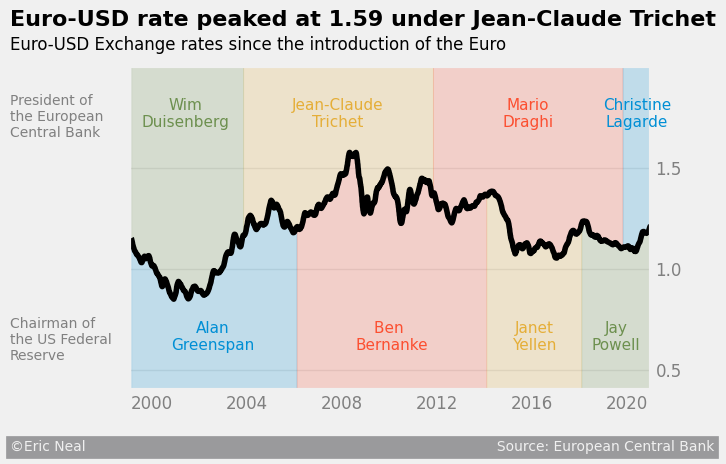

In [27]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig, ax = plt.subplots()

# plot data and set limits
ax.plot(euro_to_dollar['Time'],euro_to_dollar['rolling_mean'], color = 'black')
ax.set_ylim(0.4,2)
ax.set_xlim(euro_to_dollar['Time'].iloc[0], euro_to_dollar['Time'].iloc[-1])


# highlight the eras, add text
for chair, clr, name in zip(fed_chairs, four_colors, fed_chairs_names):
    ax.fill_between(chair['Time'],chair['rolling_mean'], color = clr, alpha = 0.2)
    ax.text(chair['Time'].mean(), 0.6, name, color=clr, size=11, horizontalalignment='center')

for pres, clr, name in zip(europe_presidents, four_colors_rev, europe_presidents_names):
    ax.fill_between(pres['Time'],pres['rolling_mean'], 2, color = clr, alpha = 0.2)
    ax.text(pres['Time'].mean(), 1.7, name, color=clr, size=11, horizontalalignment='center')

# add signature
ax.text(pd.to_datetime('1994-01-01'), 0.1, '©Eric Neal' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#9a9a9c',
        size=10)

# titles
ax.text(pd.to_datetime('1994-01-01'), 2.2, 'Euro-USD rate peaked at 1.59 under Jean-Claude Trichet', weight='bold', color = 'black', size=16)
ax.text(pd.to_datetime('1994-01-01'), 2.08, 'Euro-USD Exchange rates since the introduction of the Euro', color = 'black', size=12)

# labels for the people
ax.text(pd.to_datetime('1994-01-01'), 0.55, 'Chairman of\nthe US Federal\nReserve', color = 'grey', size=10)
ax.text(pd.to_datetime('1994-01-01'), 1.65, 'President of\nthe European\nCentral Bank', color = 'grey', size=10)

# some axis and tick changes
ax.grid(alpha=0.5)
ax.grid(axis='x', visible=False)
ax.set_yticks([0.5,1,1.5])
ax.yaxis.tick_right()
ax.tick_params(labelsize=12, labelcolor='grey')

plt.show()